# Exploratory Data Analysis on Hulu Shows

### Dataset Name : Top 1000 Hulu Shows
### Dataset Link : https://data.world/chasewillden/top-1-000-most-popular-hulu-shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shows= pd.read_csv("HuluRaw.csv")

In [4]:
shows['show/rating']

0      4.353707
1      4.363032
2      4.114007
3      4.622856
4      4.400626
         ...   
995    4.156869
996    3.363742
997    4.536517
998    4.549656
999    2.193160
Name: show/rating, Length: 1000, dtype: float64

In [5]:
shows.shape

(1000, 182)

# Cleaning Data

#### Duplicate Rows Deleted

In [6]:
shows = shows.drop_duplicates()

In [7]:
shows.shape

(362, 182)

#### Columns with only 1 unique value is deleted

In [8]:
for this_col in shows.columns:
    if(shows[this_col].nunique() == 1):
        shows = shows.drop([this_col], axis= 1)

In [9]:
shows.shape

(362, 115)

#### Columns having same values in all rows despite their different column names are deleted

In [10]:
shows = shows.T.drop_duplicates().T

In [11]:
shows.shape

(362, 62)

#### Configuring this option to see all column and rows

In [12]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)

In [13]:
shows

,show/id,show/cache_time,show/canonical_name,show/clips_count,show/description,show/episodes_count,show/genre,show/genres,show/link_description,show/name,show/rating,show/seasons_count,show/series_id,show/thumbnail_url,show/key_art_url,show/videos_count,show/art_copyright,show/is_coppa,show/show_notes/free/availability_text,show/show_notes/free/expiration_text,show/show_notes/free/notification_text,show/show_notes/free/promotional_text,show/show_notes/subscriber/availability_text,show/show_notes/subscriber/expiration_text,show/show_notes/subscriber/notification_text,show/show_notes/subscriber/promotional_text,show/available_package_ids,show/company/id,show/company/channel_id,show/company/name,show/company/canonical_name,show/company/key_art_url,show/company/network_logo_url,show/company/has_logo_url,show/show_rollups/free/clips_count,show/show_rollups/free/episodes_count,show/show_rollups/free/released_at,show/show_rollups/free/seasons_count,show/show_rollups/free/videos_count,show/show_rollups/free/latest_video_added_at,show/show_rollups/free/html5_clips_count,show/show_rollups/free/html5_episodes_count,show/show_rollups/free/html5_videos_count,show/show_rollups/free/non_rating_videos_count,show/show_rollups/free/highest_rating,show/show_rollups/subscriber/clips_count,show/show_rollups/subscriber/episodes_count,show/show_rollups/subscriber/released_at,show/show_rollups/subscriber/seasons_count,show/show_rollups/subscriber/videos_count,show/show_rollups/subscriber/latest_video_added_at,show/show_rollups/subscriber/html5_clips_count,show/show_rollups/subscriber/html5_episodes_count,show/show_rollups/subscriber/html5_videos_count,show/show_rollups/subscriber/non_rating_videos_count,show/show_rollups/subscriber/highest_rating,show/show_rollups/subscriber_on_device/released_at,show/show_rollups/subscriber_on_device/latest_video_added_at,show/show_rollups/showtime/released_at,show/show_rollups/showtime/latest_video_added_at,show/annotations/0,show/annotations/1
0,54,2017-08-10T14:53:04+00:00,family-guy,288,The adventures of an endearingly ignorant dad ...,288,Animation and Cartoons,Animation and Cartoons~Primetime Animation|Tee...,"For insider news, photos, and more visit the o...",Family Guy,4.353707,15,11730,https://ib.hulu.com/show/54?size=476x268&regio...,https://ib.hulu.com/show_key_art/54?size=1600x...,576,NaN,False,New episodes are available 8 days after air.,We are able to post up to 5 episodes at the sa...,NaN,NaN,seasons 1-14 and the current season episodes t...,NaN,NaN,NaN,"1,2,14",8,2,FOX,fox,https://ib1.hulu.com/company_key_art/8?size=16...,https://ib1.hulu.com/company_logo/8?bg=dim&col...,True,288,5,2007-09-05T19:01:09Z,1,293,2017-07-22T21:15:30Z,288,0,288,0,TV-14,288,288,2007-09-05T19:01:09Z,15,576,2017-07-22T21:15:30Z,288,0,288,0,TV-MA,2007-09-05T19:01:09Z,2017-07-22T21:15:30Z,2007-09-05T19:01:09Z,2017-07-22T21:15:30Z,NaN,NaN
1,6979,2017-08-10T14:14:33+00:00,south-park,3874,"Underpants-stealing gnomes, a talking Christma...",274,Comedy,Comedy|Animation and Cartoons~Primetime Animation,"For more on this show, visit the official <a h...",South Park,4.363032,20,50003814,https://ib3.hulu.com/show/6979?size=476x268&re...,https://ib3.hulu.com/show_key_art/6979?size=16...,4148,NaN,False,NaN,NaN,NaN,NaN,the entire series,Episodes from the new season will be available...,NaN,"Season 5, Episode 3 and Season 14, Episodes 5 ...","1,2,14",99,129,Comedy Central,comedy-central,https://ib4.hulu.com/company_key_art/99?size=1...,https://ib4.hulu.com/company_logo/99?bg=dim&co...,True,3865,10,2011-06-15T03:26:09Z,6,3875,2016-12-29T06:32:24Z,3865,10,3875,0,TV-MA,3874,274,2011-06-15T03:26:09Z,20,4148,2016-12-08T06:32:22Z,3874,274,4148,0,TV-MA,2011-06-15T03:26:09Z,2016-12-08T06:32:22Z,2011-06-15T03:26:09Z,2016-12-08T06:32:22Z,NaN,NaN
2,53,2017-08-10T14:46:51+00:00,american-dad,121,This screwball family full of radically differ...,172,Comedy,Comedy~Sitcoms|Animation and Cartoons~Primetim...,"For insider news, photos, and more visit the o..

#### Dropping all the rows and columns that are empty

In [14]:
shows.dropna(how= 'all', axis= 0, inplace= True)
shows.dropna(how= 'all', axis= 1, inplace= True)

In [15]:
shows.shape

(362, 61)

#### Heatmap (Visualization) of Null values

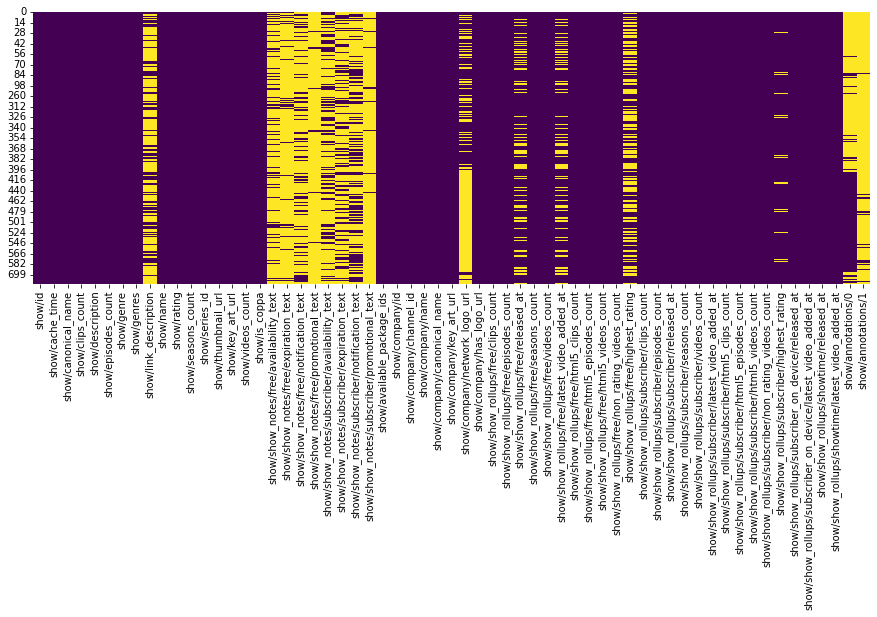

In [14]:
plt.subplots(figsize= (15,5))
sns.heatmap(shows.isnull(), cbar= False, cmap= "viridis")
plt.show()

# Handling Missing Values

#### Checking how many values are missing in each column

In [15]:
shows.isnull().sum().sort_values()

show/id                                                           0
show/company/canonical_name                                       0
show/company/has_logo_url                                         0
show/show_rollups/free/clips_count                                0
show/show_rollups/free/episodes_count                             0
show/show_rollups/free/seasons_count                              0
show/show_rollups/free/videos_count                               0
show/show_rollups/free/html5_clips_count                          0
show/show_rollups/free/html5_episodes_count                       0
show/show_rollups/free/html5_videos_count                         0
show/show_rollups/free/non_rating_videos_count                    0
show/show_rollups/subscriber/clips_count                          0
show/company/name                                                 0
show/show_rollups/subscriber/episodes_count                       0
show/show_rollups/subscriber/seasons_count      

#### Checking Percentage of Missing Values

In [16]:
for this_col in shows.columns:
    prct = np.mean(shows[this_col].isnull())
    print('{} - {}%'.format(this_col, round(prct*100)))

show/id - 0%
show/cache_time - 0%
show/canonical_name - 0%
show/clips_count - 0%
show/description - 0%
show/episodes_count - 0%
show/genre - 0%
show/genres - 0%
show/link_description - 69%
show/name - 0%
show/rating - 0%
show/seasons_count - 0%
show/series_id - 0%
show/thumbnail_url - 0%
show/key_art_url - 0%
show/videos_count - 0%
show/is_coppa - 0%
show/show_notes/free/availability_text - 78%
show/show_notes/free/expiration_text - 91%
show/show_notes/free/notification_text - 77%
show/show_notes/free/promotional_text - 96%
show/show_notes/subscriber/availability_text - 67%
show/show_notes/subscriber/expiration_text - 71%
show/show_notes/subscriber/notification_text - 61%
show/show_notes/subscriber/promotional_text - 96%
show/available_package_ids - 0%
show/company/id - 0%
show/company/channel_id - 0%
show/company/name - 0%
show/company/canonical_name - 0%
show/company/key_art_url - 0%
show/company/network_logo_url - 59%
show/company/has_logo_url - 0%
show/show_rollups/free/clips_count

#### Function to Drop the columns that have 75% or above missing values

In [17]:
def drop_cols(df):
    for col in df.columns:
        prct = np.mean(df[col].isnull())
        if prct > 0.75:
            df.drop(col, inplace= True, axis= 1)

In [18]:
drop_cols(shows)

In [19]:
shows.shape

(362, 55)

In [20]:
shows.isnull().sum().sort_values()

show/id                                                           0
show/show_rollups/free/clips_count                                0
show/show_rollups/free/episodes_count                             0
show/show_rollups/free/seasons_count                              0
show/show_rollups/free/videos_count                               0
show/show_rollups/free/html5_clips_count                          0
show/show_rollups/free/html5_episodes_count                       0
show/show_rollups/free/html5_videos_count                         0
show/show_rollups/free/non_rating_videos_count                    0
show/show_rollups/subscriber/clips_count                          0
show/show_rollups/subscriber/episodes_count                       0
show/show_rollups/subscriber/released_at                          0
show/show_rollups/subscriber/seasons_count                        0
show/show_rollups/subscriber/videos_count                         0
show/show_rollups/subscriber/latest_video_added_

### Filling Missing Values

#### Replacing the missing values in a column with "Not Rated"

In [21]:
shows['show/show_rollups/free/highest_rating'] = shows['show/show_rollups/free/highest_rating'].fillna(value= 'Not Rated')

In [22]:
shows['show/show_rollups/subscriber/highest_rating'] = shows['show/show_rollups/subscriber/highest_rating'].fillna(value= 'Not Rated')


#### Replacing missing values with corresponding date in subscriber column

In [23]:
for element in (shows.index):
    value= shows['show/show_rollups/free/latest_video_added_at'][element]
    if pd.isnull(value):
        shows['show/show_rollups/free/latest_video_added_at'][element]= shows['show/show_rollups/subscriber/latest_video_added_at'][element]

In [24]:
for element in (shows.index):
    value= shows['show/show_rollups/free/released_at'][element]
    if pd.isnull(value):
        shows['show/show_rollups/free/released_at'][element]= shows['show/show_rollups/subscriber/released_at'][element]

#### Filling the missing value with nearest value in that column using bfill and ffill method

In [25]:
data = ['show/show_notes/subscriber/notification_text', 'show/show_notes/subscriber/availability_text', 'show/show_notes/subscriber/expiration_text']

shows[data]= shows[data].fillna(method='bfill').fillna(method='ffill')

In [26]:
shows['show/annotations/0']= shows['show/annotations/0'].fillna(method='bfill').fillna(method='ffill')

#### Replacing the missing values in a column with "No Link Available"

In [27]:
shows['show/link_description'] = shows['show/link_description'].fillna(value= "No Link Available")

#### Replacing the missing value with most frequent value using mode

In [28]:
shows['show/company/network_logo_url'] = shows['show/company/network_logo_url'].fillna(shows['show/company/network_logo_url'].mode().iloc[0])


#### Heatmap (Visualization) for Null values
##### No Null Values found now

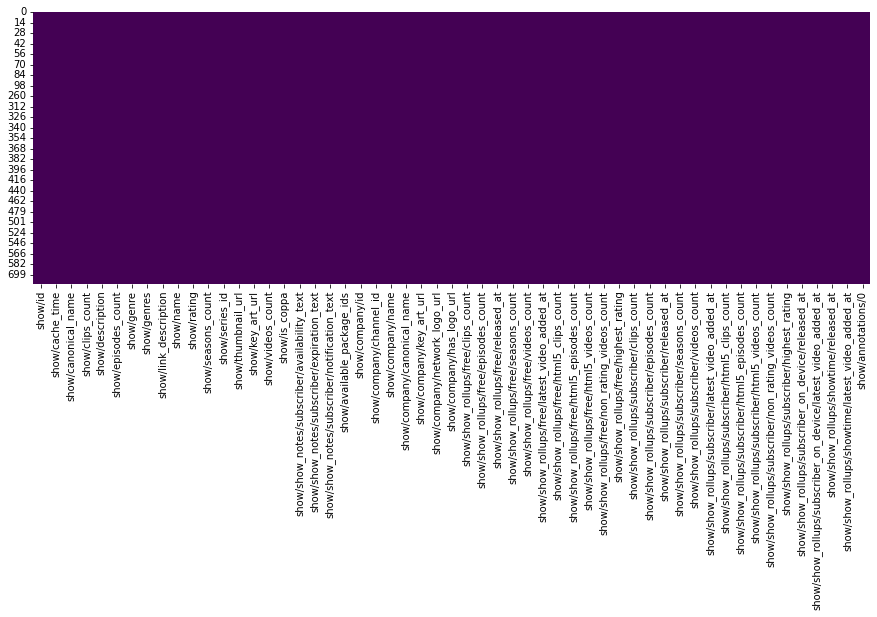

In [29]:
plt.subplots(figsize= (15,5))
sns.heatmap(shows.isnull(), cbar= False, cmap= "viridis")
plt.show()

# Sanity Check

#### Sanity Check for Rating

In [30]:
if (shows['show/rating'].max() <= 5 and shows['show/rating'].min() >= 0):
    print(shows['show/rating'].describe(), "\n")
    print("Sanity check for Show Ratings done. No outliers")
else:
    print("Outliers found")

count     362.000000
unique    129.000000
top         4.632562
freq        6.000000
Name: show/rating, dtype: float64 

Sanity check for Show Ratings done. No outliers


#### Sanity Check for TV ratings 

In [31]:
shows['show/show_rollups/subscriber/highest_rating'].value_counts()

TV-14        222
TV-PG         42
TV-MA         37
Not Rated     23
TV-Y7         15
TV-G          13
TV-Y           8
TV-Y7-FV       2
Name: show/show_rollups/subscriber/highest_rating, dtype: int64

In [32]:
shows['show/show_rollups/free/highest_rating'].value_counts()

Not Rated    173
TV-14        145
TV-PG         38
TV-MA          4
TV-Y           2
Name: show/show_rollups/free/highest_rating, dtype: int64

#### Sanity Check for Company Name

In [33]:
shows['show/company/name'].value_counts()

ABC                                    74
FOX                                    66
NBC                                    47
Nickelodeon                            23
Comedy Central                         19
CBS                                    14
MTV                                    12
Fox Television Classics                10
Cartoon Network                        10
Viz Media                               8
FXX                                     8
Sony Pictures Television                6
Hulu Original Series                    6
Funimation                              5
USA                                     5
CMT                                     5
Warner Bros.                            4
Freeform                                4
ABC Studios                             4
SHOWTIME                                4
Toei Animation                          3
Sesame Street                           2
Disney XD                               2
TNT                               

#### Sanity Check for Show Names
##### Show name can only contain alphabets, numbers, space and special characters like ! : , . - ' &

In [34]:
import string

alpha= string.ascii_letters
digit= string.digits
spchar= " :,'-.!&"

allowed_char = alpha + digit + spchar

for element in shows.index:
    for ch in shows['show/name'][element]:
        if ch not in allowed_char:
            print('Show name is not correct')
            print('Sanity check failed')
            break
print("Sanity check for Show Names done.")

Sanity check for Show Names done.


# EDA

In [35]:
shows.dtypes

show/id                                                         object
show/cache_time                                                 object
show/canonical_name                                             object
show/clips_count                                                object
show/description                                                object
show/episodes_count                                             object
show/genre                                                      object
show/genres                                                     object
show/link_description                                           object
show/name                                                       object
show/rating                                                     object
show/seasons_count                                              object
show/series_id                                                  object
show/thumbnail_url                                              object
show/k

In [36]:
shows['show/rating'] = shows['show/rating'].astype(float)

In [37]:
shows["show/rating"] = round(shows["show/rating"],2)

In [38]:
data = ['show/clips_count','show/episodes_count','show/seasons_count','show/videos_count','show/show_rollups/free/clips_count','show/show_rollups/subscriber/videos_count','show/show_rollups/subscriber/seasons_count','show/show_rollups/subscriber/episodes_count', 'show/show_rollups/subscriber/clips_count', 'show/show_rollups/free/seasons_count', 'show/show_rollups/free/videos_count','show/show_rollups/free/episodes_count']

shows[data] = shows[data].astype(int)

## Univariate Analysis

### Categorical Variables

In [39]:
company_name = shows['show/company/name'].value_counts()

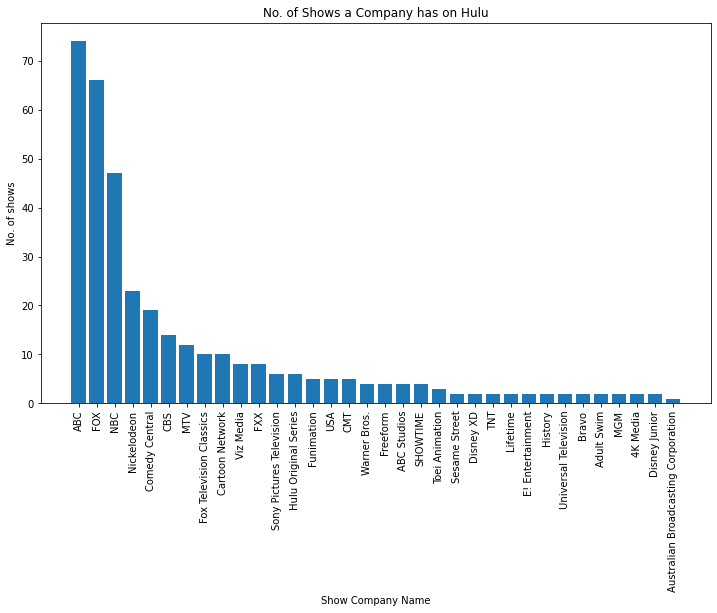

In [40]:
plt.subplots(figsize= (12,7))
plt.bar(x= company_name.index, height= company_name.values)
plt.xticks(rotation= 90)
plt.ylabel('No. of shows')
plt.xlabel('Show Company Name')
plt.title('No. of Shows a Company has on Hulu')
plt.show()

ABC has the highest number of shows on Hulu whereas Australian Broadcasting Corporation has the least amount of shows.

In [41]:
show_genre = shows['show/genre'].value_counts()

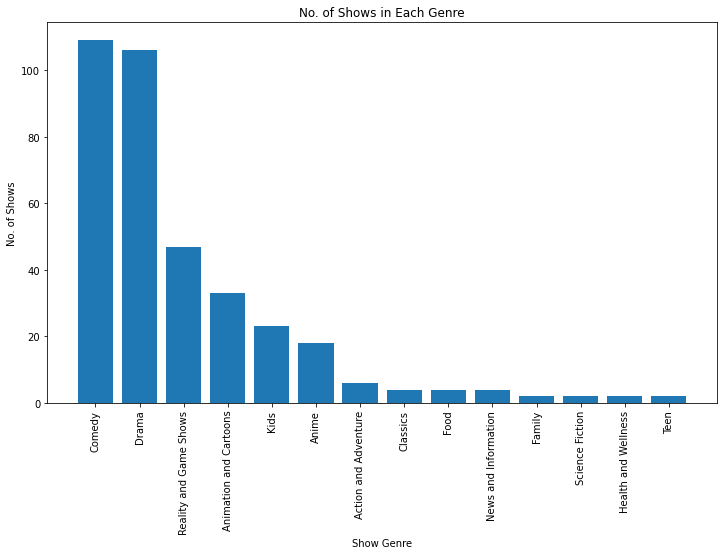

In [42]:
plt.subplots(figsize= (12,7))
plt.bar(x= show_genre.index, height= show_genre.values)
plt.xticks(rotation= 90)
plt.ylabel('No. of Shows')
plt.xlabel('Show Genre')
plt.title('No. of Shows in Each Genre')
plt.show()

Comedy and Drama shows are the most watched shows on Hulu

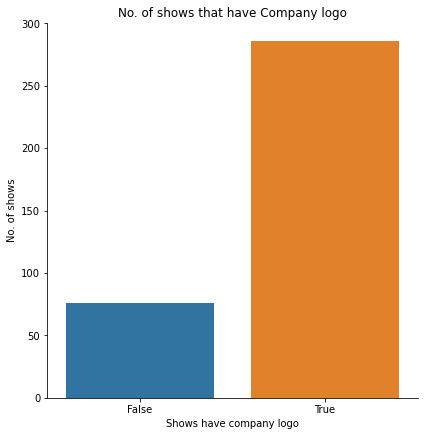

In [43]:
plot = sns.catplot(data= shows, kind= 'count', x= 'show/company/has_logo_url', aspect= 1, height= 6)
plot.ax.set_title("No. of shows that have Company logo")
plot.ax.set_xlabel("Shows have company logo")
plot.ax.set_ylabel("No. of shows")
plt.show()

Most of the shows have their company logo on them

In [44]:
subscriber_tv_rating = shows['show/show_rollups/subscriber/highest_rating'].value_counts()

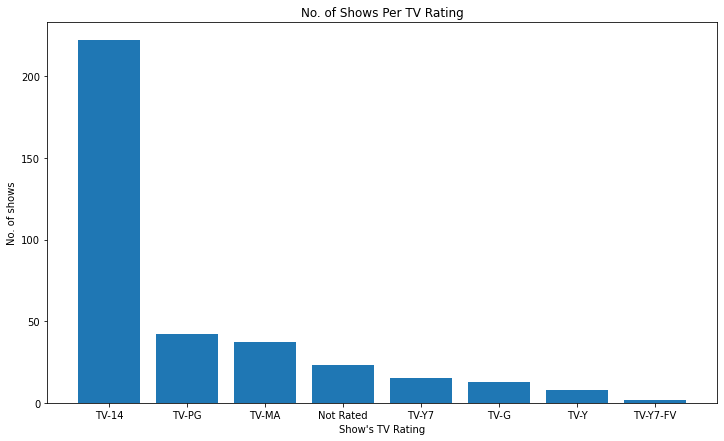

In [45]:
plt.subplots(figsize= (12,7))
plt.bar(x= subscriber_tv_rating.index, height= subscriber_tv_rating.values)
plt.ylabel('No. of shows')
plt.xlabel("Show's TV Rating")
plt.title('No. of Shows Per TV Rating')
plt.show()

More than 230 shows have TV-14 rating so most of the shows are not appropriate for children below 14 years

### Continuous Variables

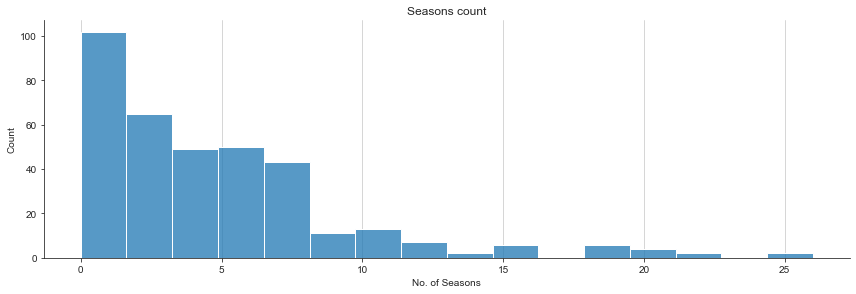

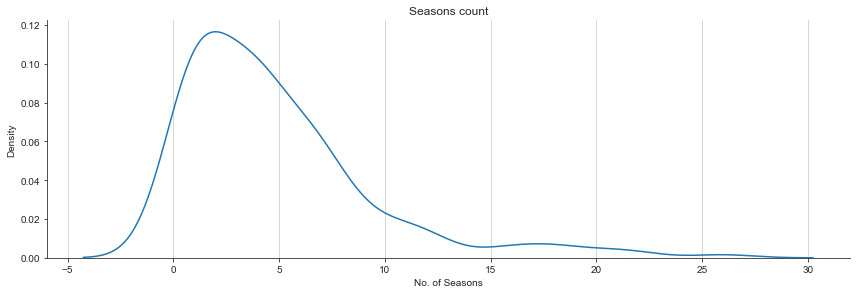

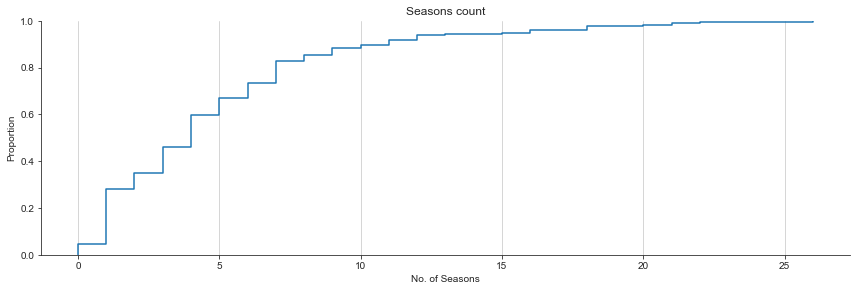

In [46]:
sns.set_style('ticks')

plot = sns.displot(data= shows, x= 'show/seasons_count', kind= 'hist', height= 4, aspect= 3)
plot.set(title= "Seasons count")
plot.set(xlabel= "No. of Seasons")
plot.ax.grid(axis= 'x')

plot = sns.displot(data= shows, x= 'show/seasons_count', kind= 'kde', height= 4, aspect= 3)
plot.set(title= "Seasons count")
plot.set(xlabel= "No. of Seasons")
plot.ax.grid(axis= 'x')

plot = sns.displot(data= shows, x= 'show/seasons_count', kind= 'ecdf', height= 4, aspect= 3)
plot.set(title= "Seasons count")
plot.set(xlabel= "No. of Seasons")
plot.ax.grid(axis= 'x')

60% of the shows have 5 or less seasons. Mostly have 1-2 seasons only

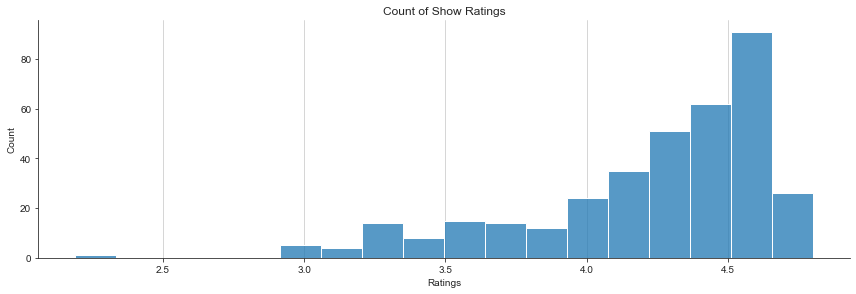

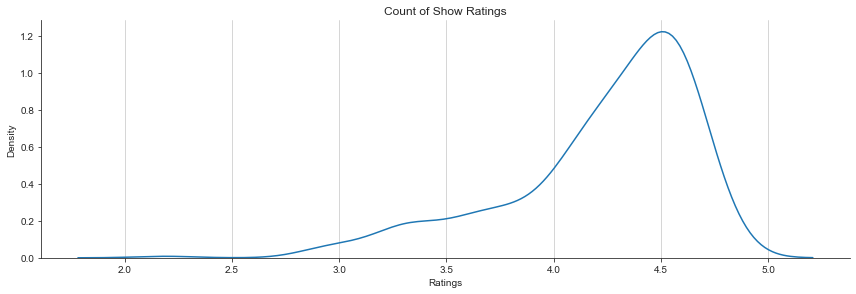

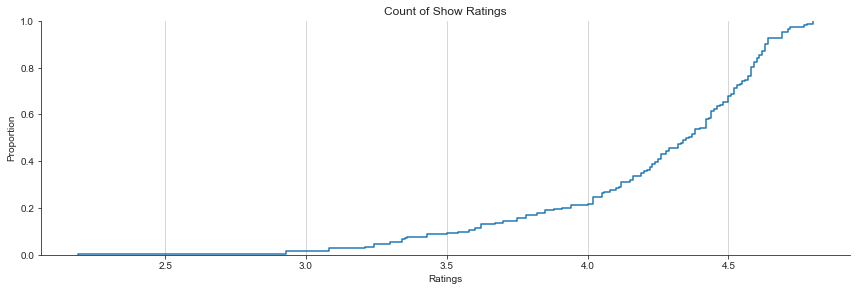

In [47]:
sns.set_style('ticks')

plot = sns.displot(data= shows, x= 'show/rating', kind= 'hist', height= 4, aspect= 3)
plot.set(title= "Count of Show Ratings")
plot.set(xlabel= "Ratings")
plot.ax.grid(axis= 'x')

plot = sns.displot(data= shows, x= 'show/rating', kind= 'kde', height= 4, aspect= 3)
plot.set(title= "Count of Show Ratings")
plot.set(xlabel= "Ratings")
plot.ax.grid(axis= 'x')

plot = sns.displot(data= shows, x= 'show/rating', kind= 'ecdf', height= 4, aspect= 3)
plot.set(title= "Count of Show Ratings")
plot.set(xlabel= "Ratings")
plot.ax.grid(axis= 'x')

Most of the shows have around 4.5 rating but 20% shows have less than 4 rating

## Multivariate Analysis

### Categorical Variables vs Categorical Variables

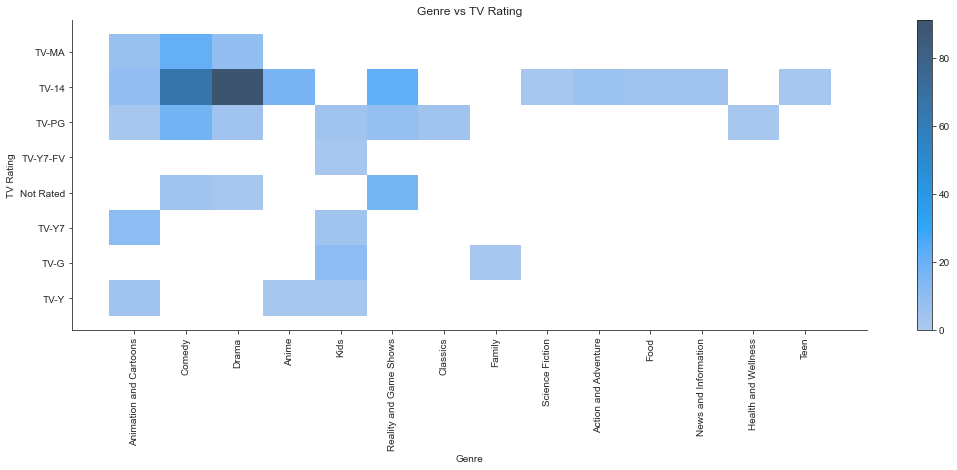

In [48]:
plot = sns.displot(shows, x= "show/genre", y= "show/show_rollups/subscriber/highest_rating", cbar= True, aspect= 3)
plot.set(title= "Genre vs TV Rating", xlabel= "Genre", ylabel= "TV Rating")
plot.ax.tick_params(axis= 'x', labelrotation= 90)


- Animation and Cartoon shows are for wider audience i.e some shows are suitable for children while some are good for adults only.
- Comedy shows are only for adults and children over 14 years of age.
- Family shows are suitable for everyone.
- Most of the Drama and Comedy show have the rating of TV-14

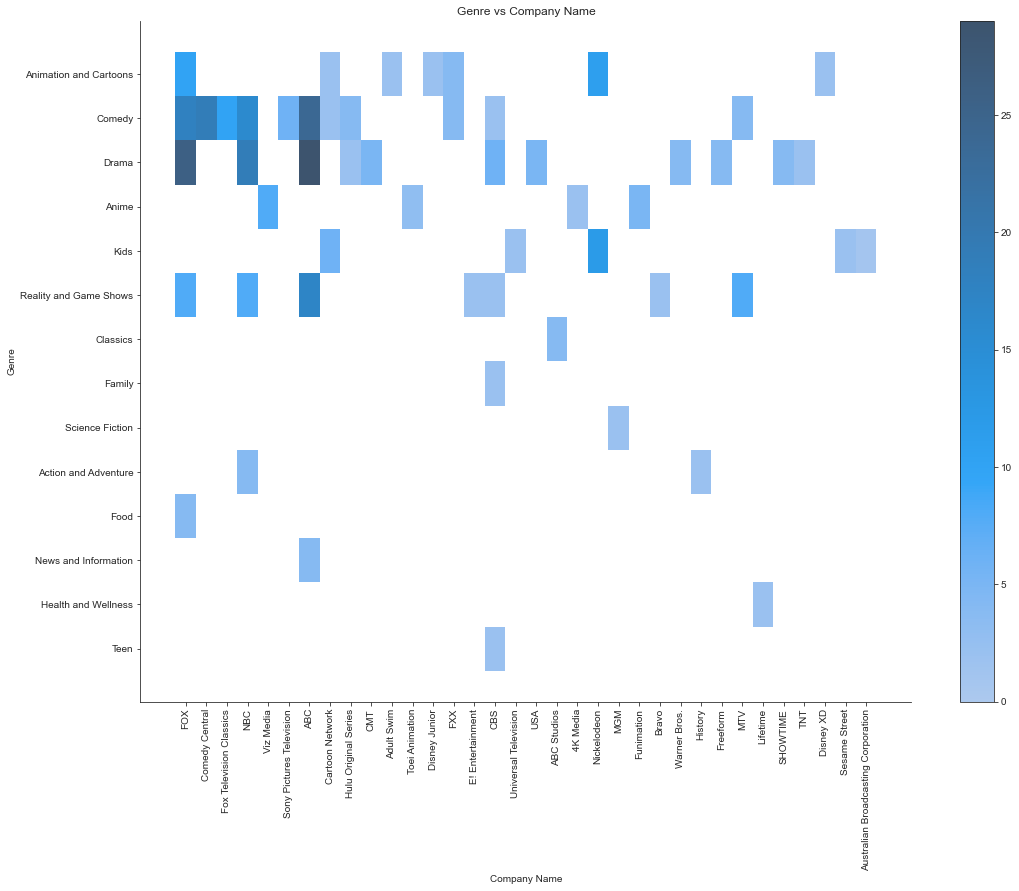

In [49]:
plot = sns.displot(shows, y= "show/genre", x= "show/company/name", cbar= True, aspect= 4)
plot.set(title= "Genre vs Company Name", xlabel= "Company Name", ylabel= "Genre")
plot.ax.tick_params(axis='x', labelrotation = 90)
plot.fig.set_figwidth(15)
plot.fig.set_figheight(11)

From this graph we can infer that many genres are specific to companies like

- Teen shows are from CBS only
- Health and wellness show belongs to Lifetime company
- News and information show is from ABC
- Food genre shows are from FOX

Australian broadcasting corporation, sesame street, Disney XD, Nickelodeon, Universal Television, Cartoon Network, Disney junior produces shows mainly for kids.

ABC and FOX mainly have Comedy and Drama shows

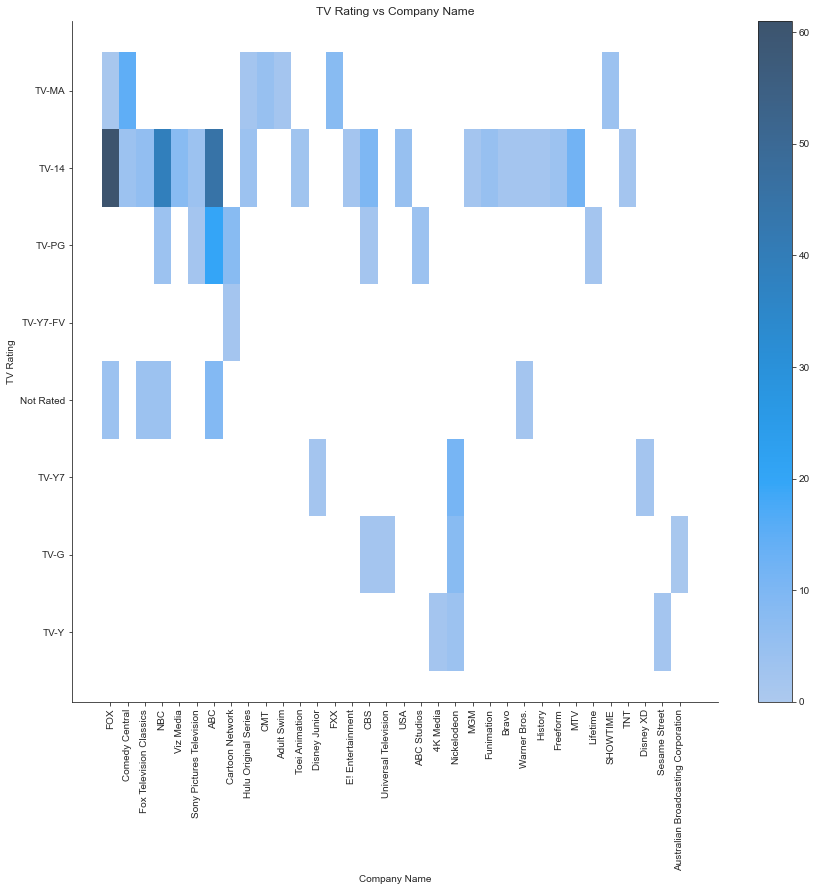

In [50]:
plot = sns.displot(shows, x= "show/company/name", y= "show/show_rollups/subscriber/highest_rating", cbar= True)
plot.set(title= "TV Rating vs Company Name", xlabel= "Company Name", ylabel= "TV Rating")
plot.ax.tick_params(axis= 'x', labelrotation= 90)
plot.fig.set_figwidth(15)
plot.fig.set_figheight(11)

- Most of the shows from FOX, ABC, NBC have the rating of TV-14
- SHOWTIME shows have the rating of TV-MA so it is for Mature adults only
- Young children can watch shows by 4K Media, Nicklodeon, Sesame Street

### Categorical vs Continuous Variables

/Users/pavanireddyvelma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


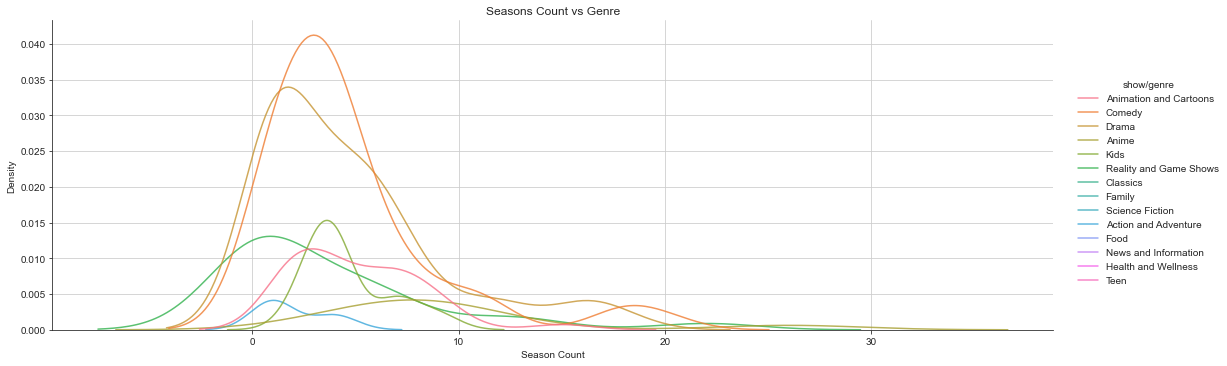

In [51]:
plot = sns.displot(data= shows, kind= "kde", x= "show/seasons_count", hue= 'show/genre', aspect= 3, alpha= 0.8)
plot.set(title= "Seasons Count vs Genre", xlabel= "Season Count")
plot.ax.grid()

- Most of the shows are from comedy and drama genre and they mostly have 2-4 seasons.
- Action and Adventure shows went for less than 5 seasons.
- Anime genre shows ran for the longest time i.e. they have the highest no. of seasons.

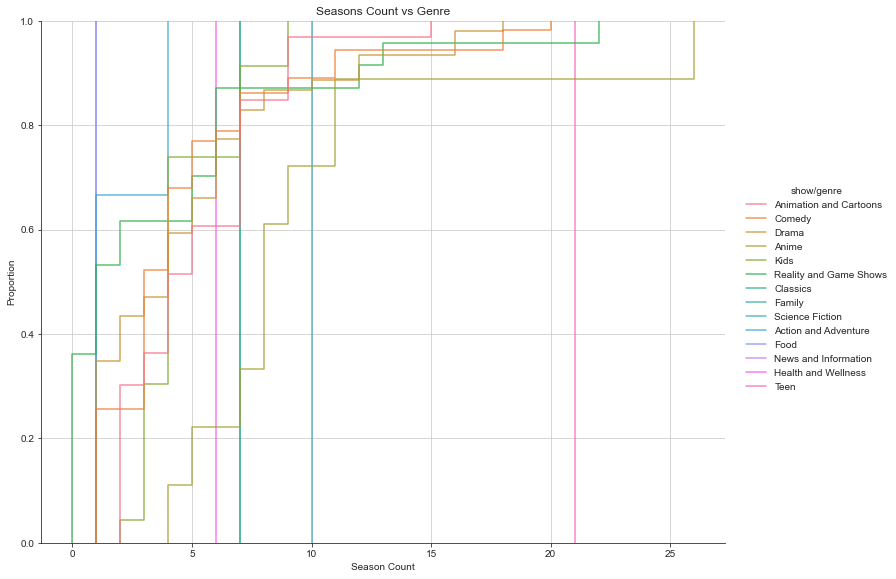

In [52]:
plot = sns.displot(data= shows, kind= "ecdf", x= "show/seasons_count", hue= 'show/genre', aspect= 1.3, alpha= 0.8, height= 8)
plot.set(title= "Seasons Count vs Genre", xlabel= "Season Count")
plot.ax.grid()

With this graph we can tell the genres that just have 1 show and for how many seasons that show ran
- Science Fiction just has 1 show which went for 10 seasons
- Health and Wellness has 1 with 6 seasons
- Teen genre show went for 21 seasons
- Food genre show just has 1 season. So maybe it isn't popular among audience

/Users/pavanireddyvelma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


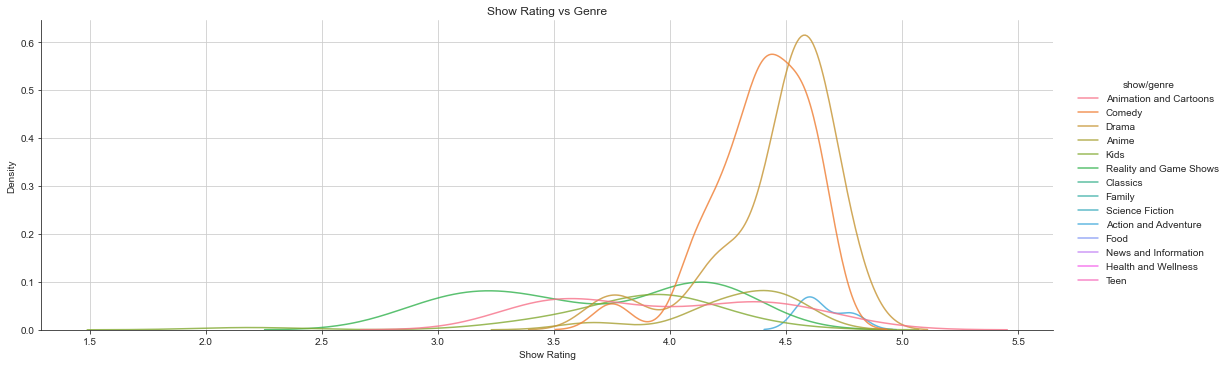

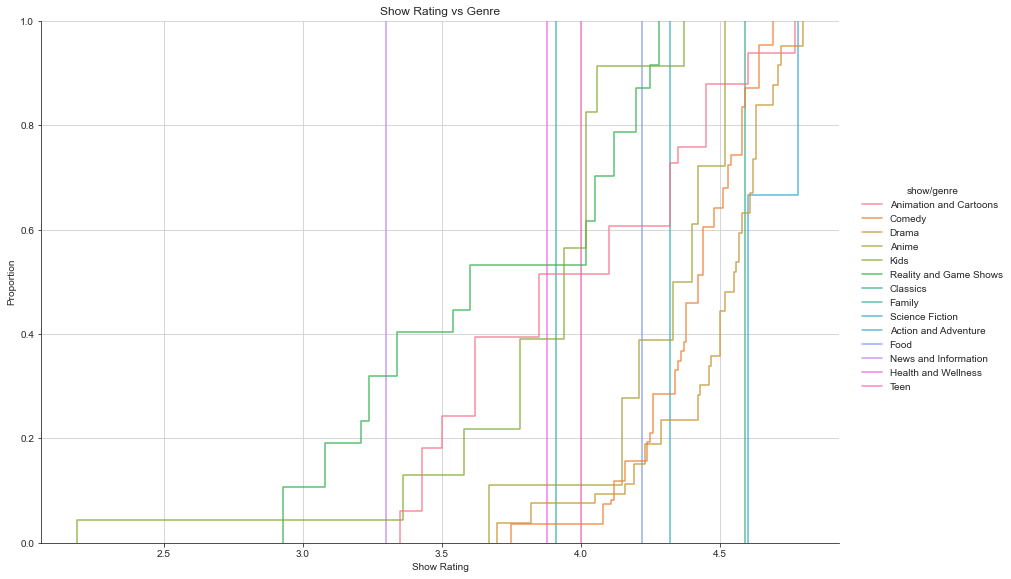

In [53]:
plot= sns.displot(data= shows, kind= "kde", hue= "show/genre", x= "show/rating", aspect= 3, alpha= 0.8)
plot.set(title= "Show Rating vs Genre", xlabel= "Show Rating")
plot.ax.grid()

plot= sns.displot(data= shows, kind= "ecdf", hue= "show/genre", x= "show/rating", aspect= 1.5, alpha= 0.8, height= 8)
plot.set(title= "Show Rating vs Genre", xlabel= "Show Rating")
plot.ax.grid()

- 90% of the Comedy and Drama shows have the rating of 4 and above and mostly have the rating from 4.4 - 4.6
- Kids shows have the widest range of ratings
- Teen show rating is 4.0
- Health and wellness and family show have the rating of close to 3.9

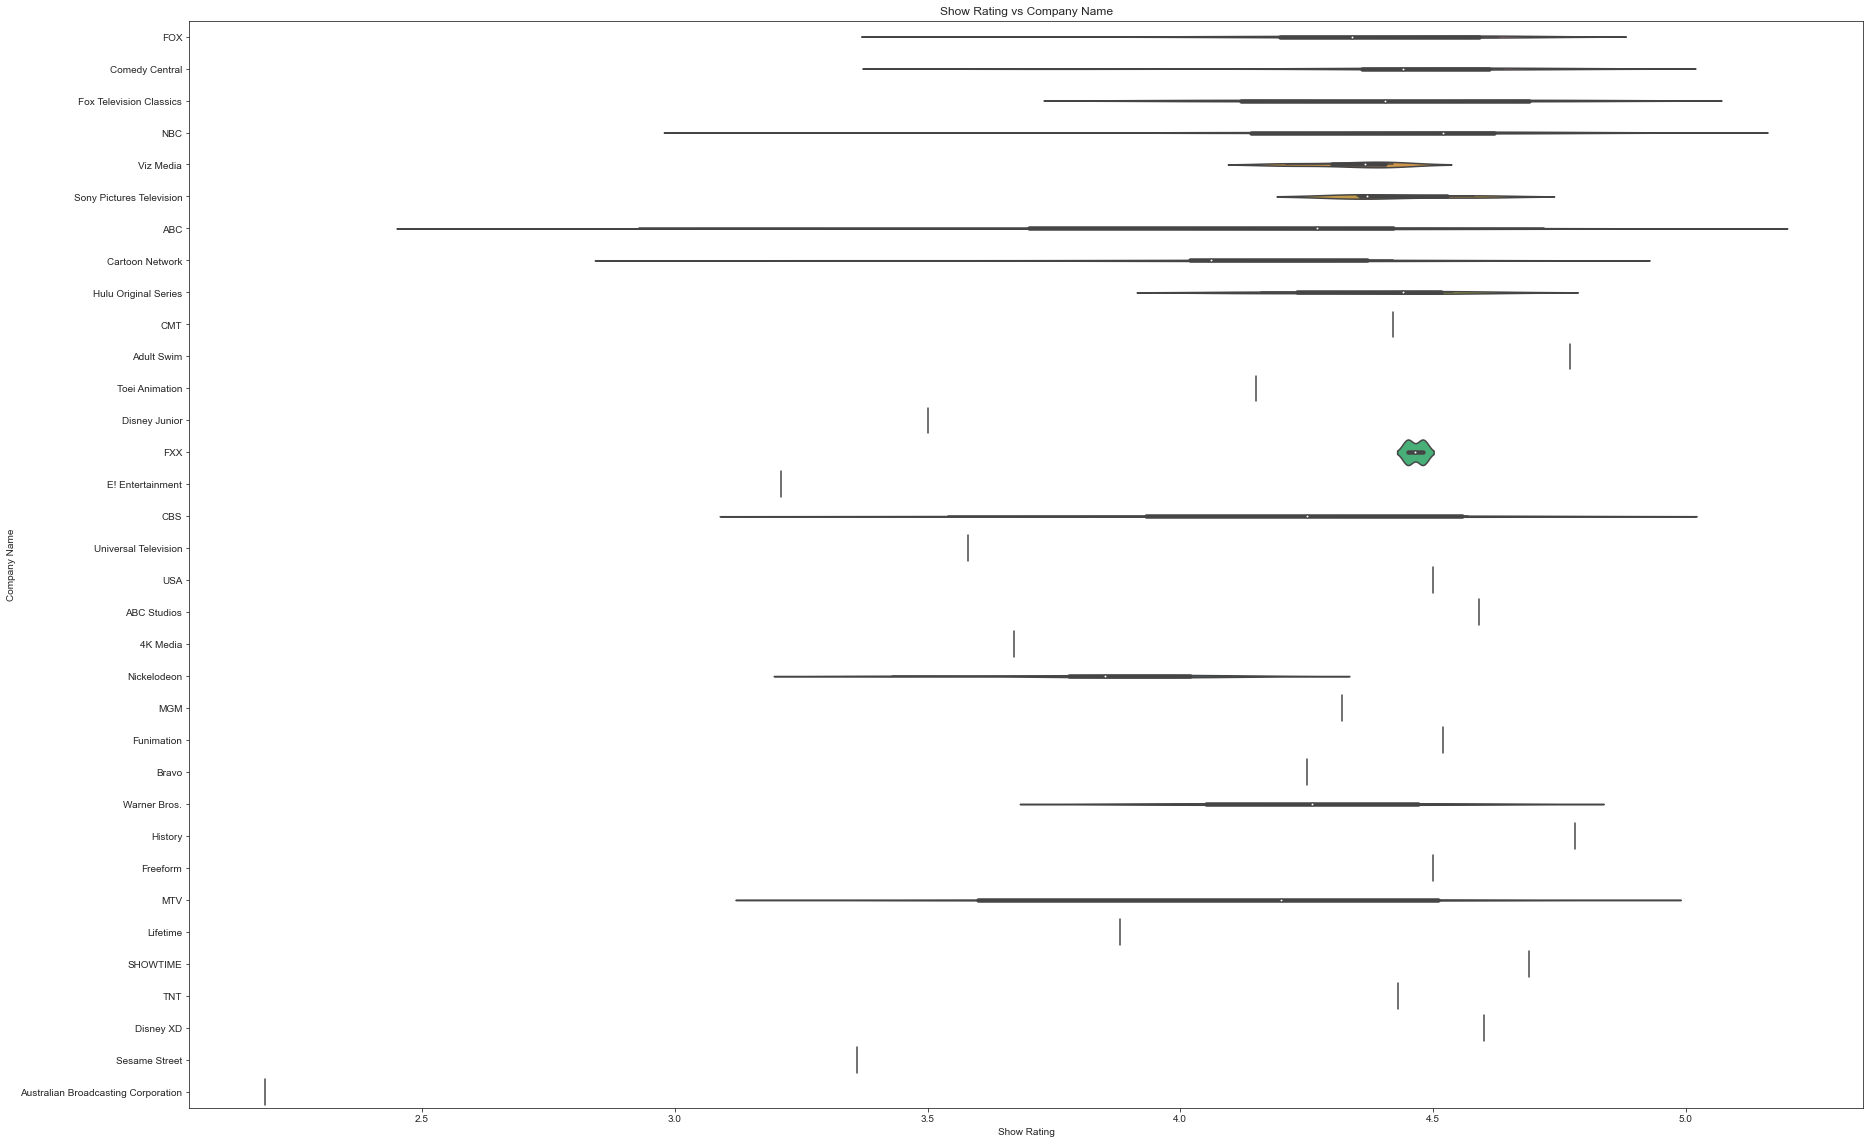

In [54]:
plt.subplots(figsize= (30,20))
plot= sns.violinplot(data= shows, y= 'show/company/name', x= 'show/rating')
plot.set(title= "Show Rating vs Company Name", xlabel= "Show Rating", ylabel= 'Company Name')
plt.show()

- FXX company shows have the least variataion in their rating with rating of 4.4 - 4.5
- ABC company shows have the most variataion in their rating

/Users/pavanireddyvelma/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


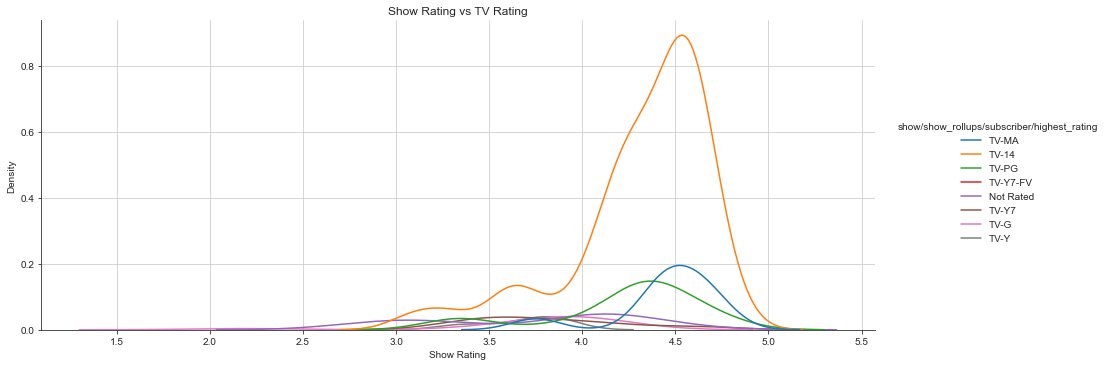

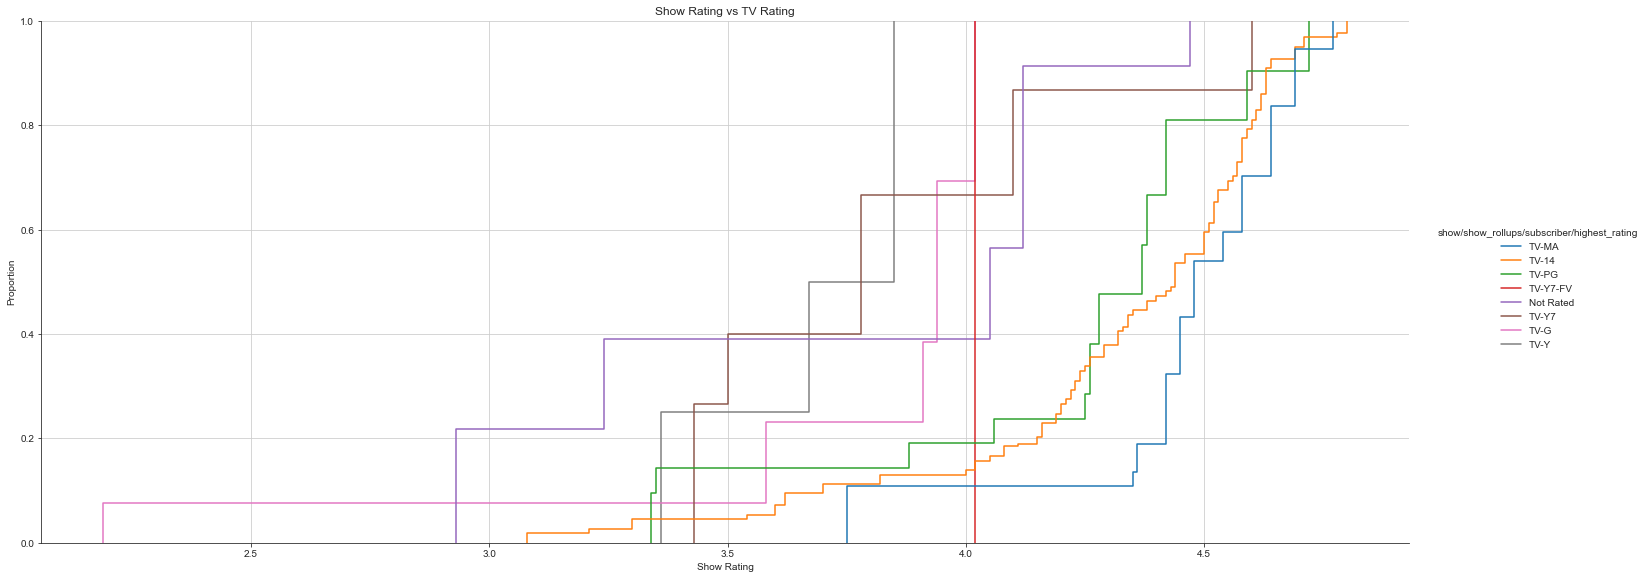

In [55]:
plot= sns.displot(data= shows, kind= "kde",hue= "show/show_rollups/subscriber/highest_rating", x= "show/rating", aspect= 2.5, alpha= 1)
plot.set(title= "Show Rating vs TV Rating", xlabel= "Show Rating")
plot.ax.grid()

plot= sns.displot(data= shows, kind= "ecdf", hue= "show/show_rollups/subscriber/highest_rating", x ="show/rating", aspect= 2.5, alpha= 1, height= 8)
plot.set(title= "Show Rating vs TV Rating", xlabel= "Show Rating")
plot.ax.grid()

- Most of the TV-14 shows have the rating of 4.5
- TV-Y7-FV show has the rating of 4
- 90% of the TV-PG shows have the rating of more than 3.5

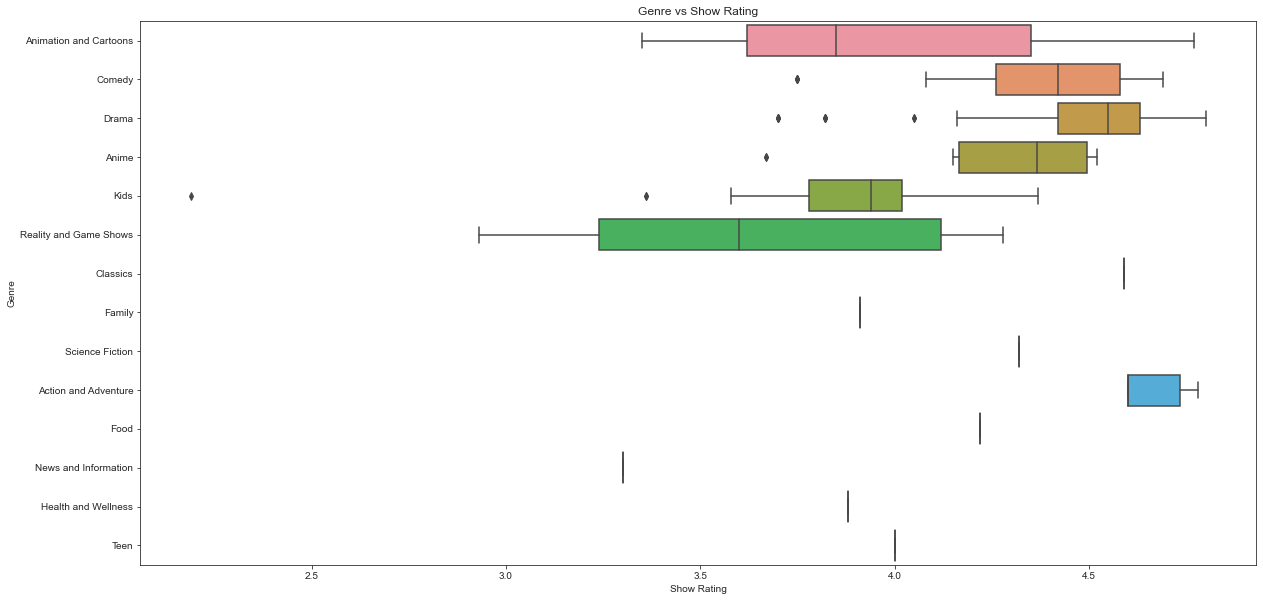

In [56]:
plt.subplots(figsize = (20,10))
plot = sns.boxplot(data= shows, y= 'show/genre', x= 'show/rating')
plot.set(title= "Genre vs Show Rating", xlabel= "Show Rating", ylabel= "Genre")
plt.show()

- Most of the Comedy and Drama shows have the rating of 4 and above
- Action and Adventure shows have the rating of more than 4.5
- Food genre has only 1 show which has the rating of 4.2
- Teen show has the rating of 4
- 'Animation and Cartoons' and 'Reality and Game shows' have the highest variation in ratings

### Numerical vs Numerical Variables

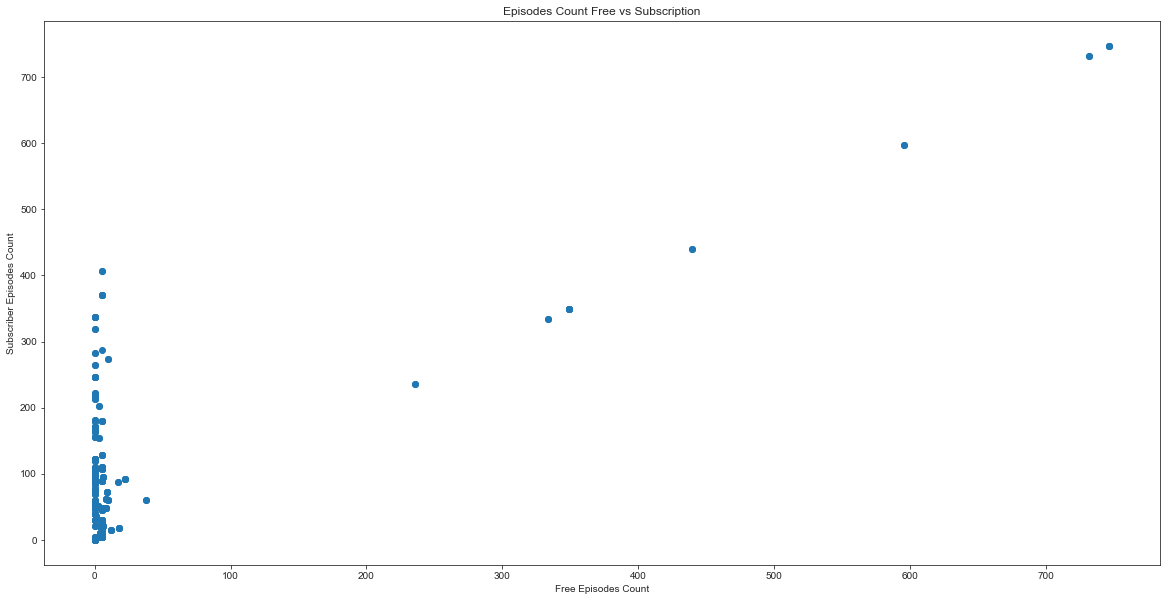

In [57]:
plt.subplots(figsize= (20,10))
plt.scatter(data= shows, x= "show/show_rollups/free/episodes_count", y= "show/show_rollups/subscriber/episodes_count")
plt.xlabel('Free Episodes Count')
plt.ylabel('Subscriber Episodes Count')
plt.title('Episodes Count Free vs Subscription')
plt.show()

On Hulu, most of the episodes are available for Subscribers only

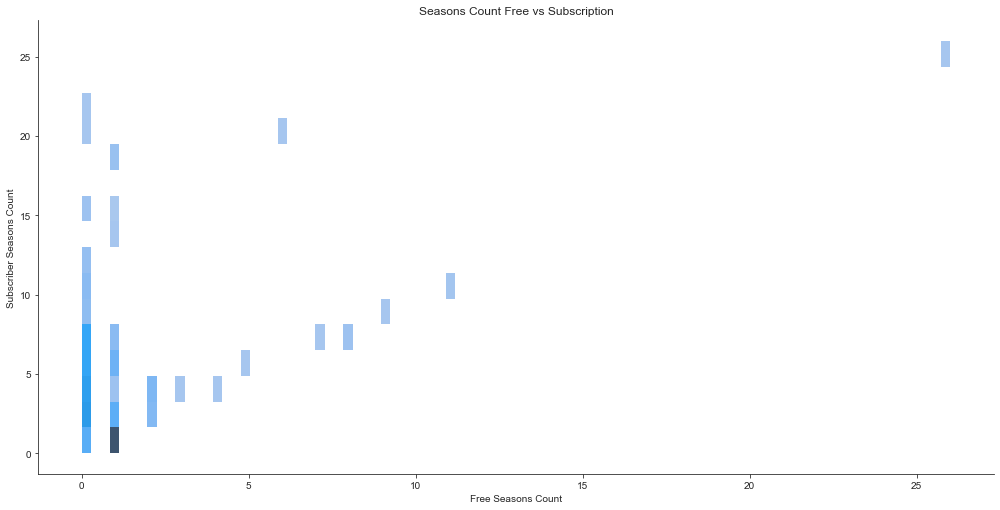

In [58]:
sns.displot(data= shows, x= "show/show_rollups/free/seasons_count", y= "show/show_rollups/subscriber/seasons_count", aspect= 2, height= 7)
plt.xlabel('Free Seasons Count')
plt.ylabel('Subscriber Seasons Count')
plt.title('Seasons Count Free vs Subscription')
plt.show()

- Most of the Seasons are available for Subscribers only
- Mostly just 1-2 seasons of shows are available for free

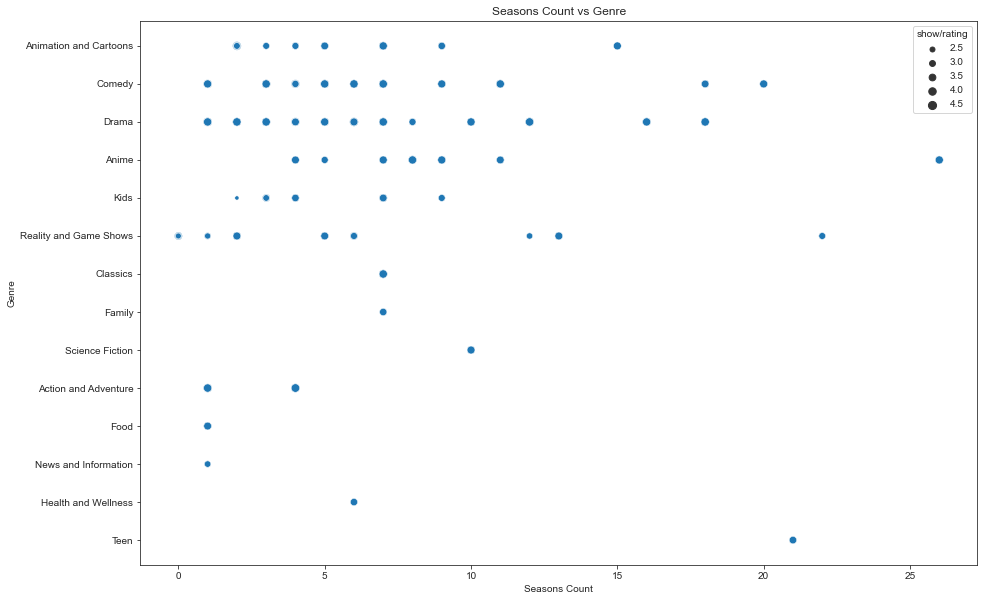

In [59]:
plt.subplots(figsize= (15,10))
sns.scatterplot(data= shows, x= "show/seasons_count", y= "show/genre", size= "show/rating")
plt.xlabel('Seasons Count')
plt.ylabel('Genre')
plt.title('Seasons Count vs Genre')
plt.show()

- Health and Wellness show has 6 seasons with a rating of around 3.5
- News and Information show has 1 season with a rating of 3
- Food show also has 1 season with a rating of 4
- Teen show has more than 20 seasons with the rating of 3.5
- Comedy shows mostly have 4.5 rating with 1 season shows to 20 seasons shows
- 1 of the kids show have the least rating i.e 2.5

# Analysis Report:

Among the Popular shows on Hulu, most of the shows are from Comedy and Drama genre which have the rating of 4 and above. Since most of the Drama and comedy shows have the TV rating of TV-14 so families can watch with kids above 14 years old.

If young children are there in the family then Hulu also has shows from companies like Sesame Street, Disney XD, Nickelodeon, Cartoon Network, Disney junior etc which are very popular for their kids show.

If one is interested in Anime then among the Popular shows there is a good collection of Anime shows as well. 1 of the Anime show is the longest show on Hulu.

Even Animation and Cartoon shows are available which are for wider audience i.e. for kids as well as adults.

If one is into Action and Adventure genre, then they have good shows on Hulu with a rating of more than 4.5.

ABC has the highest number of shows on Hulu whereas Australian Broadcasting Corporation has the least amount of shows.

If one is looking for Teen, Food or 'Health and Wellness' shows then Hulu might not be the best choice since it has very less shows in these genres. Hulu also has very less Fantasy violence shows.

If one is interested in Hulu then is it better to take it's subscription because most of the Episodes/Seasons are available for subscribers only.

### Reference:

https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns#:~:text='%2C'alpha'%5D-,df.,column%20name%20is%20duplicated%20earlier